# Оценка прибыльности скважин по данным геологической разведки
__[Александр Бинько](https://t.me/ABin_98)__

# ➢ Описание проекта
_Нефтедобывающая компания предоставила данные о количестве и качестве ископаемых
в нескольких регионах. Необходимо построить модель, которая сможет предсказать
объём запасов нефти в новых скважинах, а затем отобрать участки с наивысшим
потенциалом._

# ➢ Требования
> * Подготовить и исследовать данные
>
>
> * Обучить модель, предсказать средний запас сырья
>
>
> * Рассчитать потенциальную прибыль и риски для каждого региона
>
>
> * Бутстрапировать выборку, вычислить 95%-й доверительный интервал для
> целевых показателей
>
>
> * Предложить регион для разработки скважин, обосновать вывод

# ➢ Полученные данные
_Для выполнения проекта был получен один файл с расширением_ **.csv**, \
    _объёмом 3,8 МБ. Файл содержит необходимые для исследования данные, \
    разделенные на 5 столбцов._


### **Стек проекта:**
**python** 3.12 | **pandas** 2.2.2
**seaborn** 0.13.2 | **numpy**  1.26.4

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy.random import RandomState
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Ⅰ Шаг. Загрузка данных и изучение общей информации

In [2]:
df0 = pd.read_csv('geo_data_0.csv', index_col='id')
df1 = pd.read_csv('geo_data_1.csv', index_col='id')
df2 = pd.read_csv('geo_data_2.csv', index_col='id')

all_df = [df0, df1, df2]

In [3]:
for df in all_df:
    print(df.info(verbose=True), df.head(), '\n')

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, txEyH to 1CWhH
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB
None              f0        f1        f2     product
id                                             
txEyH  0.705745 -0.497823  1.221170  105.280062
2acmU  1.334711 -0.340164  4.365080   73.037750
409Wp  1.022732  0.151990  1.419926   85.265647
iJLyR -0.032172  0.139033  2.978566  168.620776
Xdl7t  1.988431  0.155413  4.751769  154.036647 

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, kBEdx to relB0
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2   

**Промежуточный вывод:**
>_Данные, полученные из таблиц, соответствуют заявленным в техническом задании.
Фреймворк корректно привёл типы для всех записей, пропуски в строках отсутствуют.
Колонки имеют унифицированные имена, соответствующие PEP8._

## ➢ Описание данных

**id** - уникальный идентификатор скважины

**f0, f1, f2** - некоторые значимые признаки для точек

**product** - объём запасов в скважине

## ➢ Дубликаты в индексной переменной

In [4]:
for df in all_df:
    print('\nКоличество дубликатов по индексной переменной:',
          df.index.duplicated().sum())


Количество дубликатов по индексной переменной: 10

Количество дубликатов по индексной переменной: 4

Количество дубликатов по индексной переменной: 4


**Промежуточный вывод:**
>_Решив задачу о "днях рождения" для набора данных с заданными параметрами, получим
вероятность случайной коллизии в идентификаторах скважин: 1 − exp(−5.45) ≈ 0.0043,
что можно считать достаточно низким риском._

In [5]:
def analysis(df):
    nums = df.select_dtypes(include=['number']).columns.tolist()
    for num in nums:
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(df[num], kde=True, color='red')
        plt.title(f'Гистограмма для {num}')
        plt.ylabel('Частота')
        plt.xlabel(num)

        plt.subplot(1, 2, 2)
        sns.boxplot(y=num, data=df, color='green')
        plt.title(f'Boxplot для {num}')
        plt.ylabel('Значение')

        plt.tight_layout()
        plt.show()

## ➢  Визуализация распределений и мультиколлинеарность дизайн матрицы для региона №1

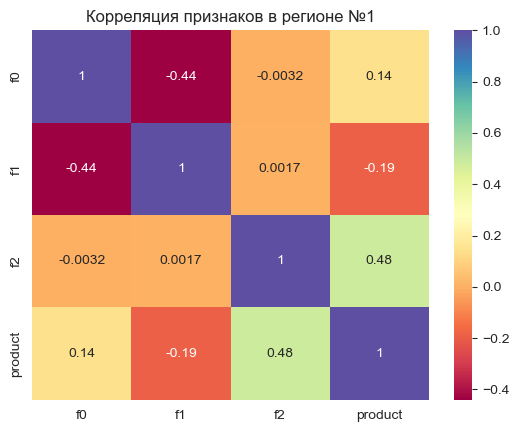

In [6]:
ax = sns.heatmap(data=df0.corr(), annot=True, cmap='Spectral')
ax.set(title='Корреляция признаков в регионе №1');

**Промежуточный вывод:**  
>_Вычисление коэффициентов корреляции Пирсона показало отсутствие выраженной  
мультиколлинеарности в признаковом пространстве. Некоторой мерой линейной  
созависимости обладают пары признаков **f0 и f1**, тогда как с объёмом запасов  
нефти коррелирует **f2**._

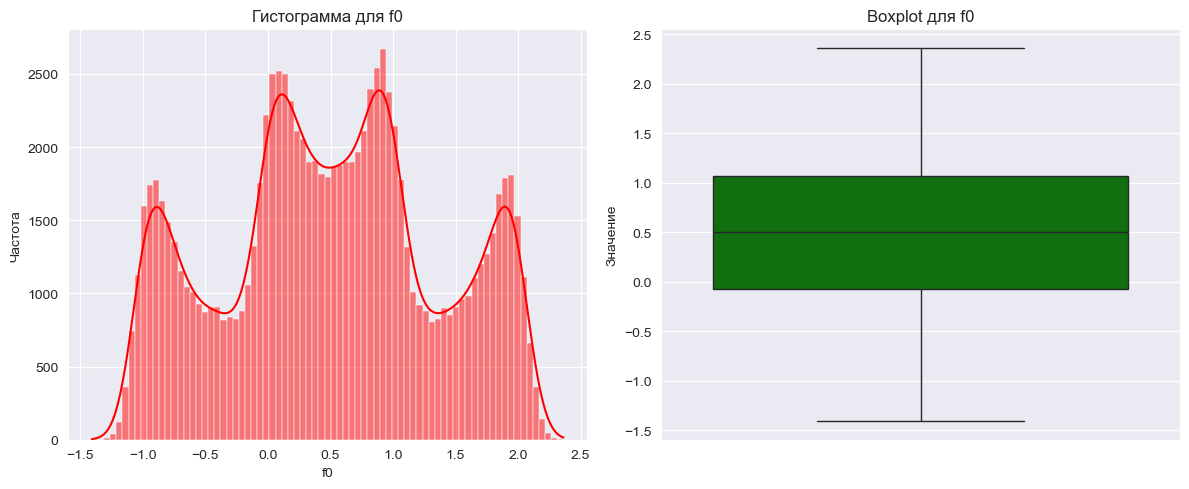

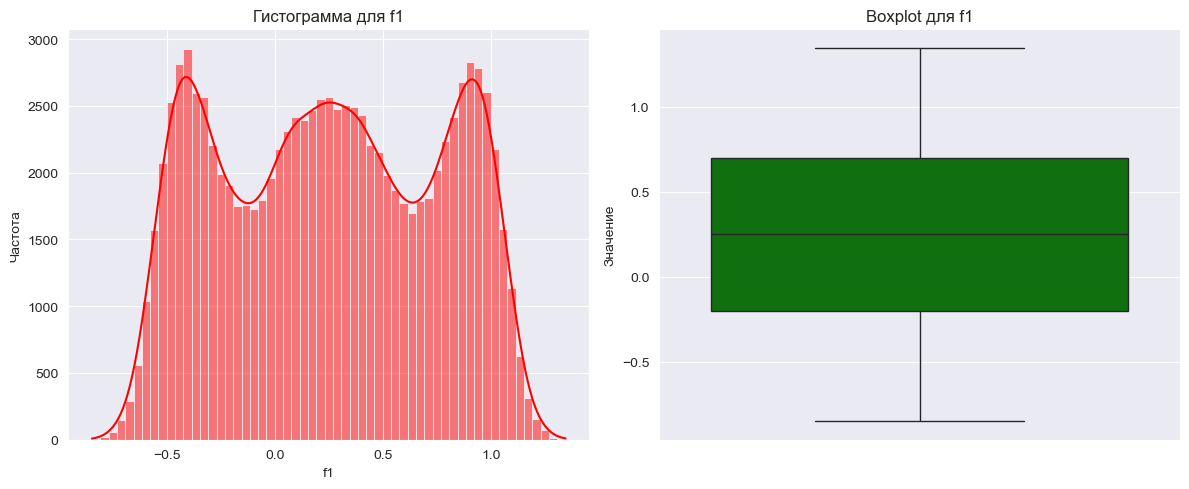

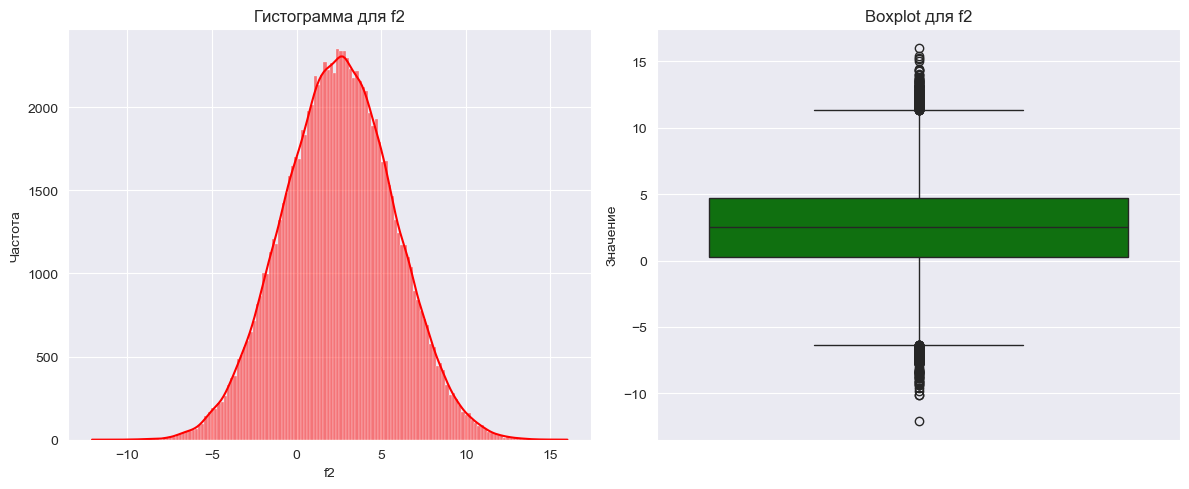

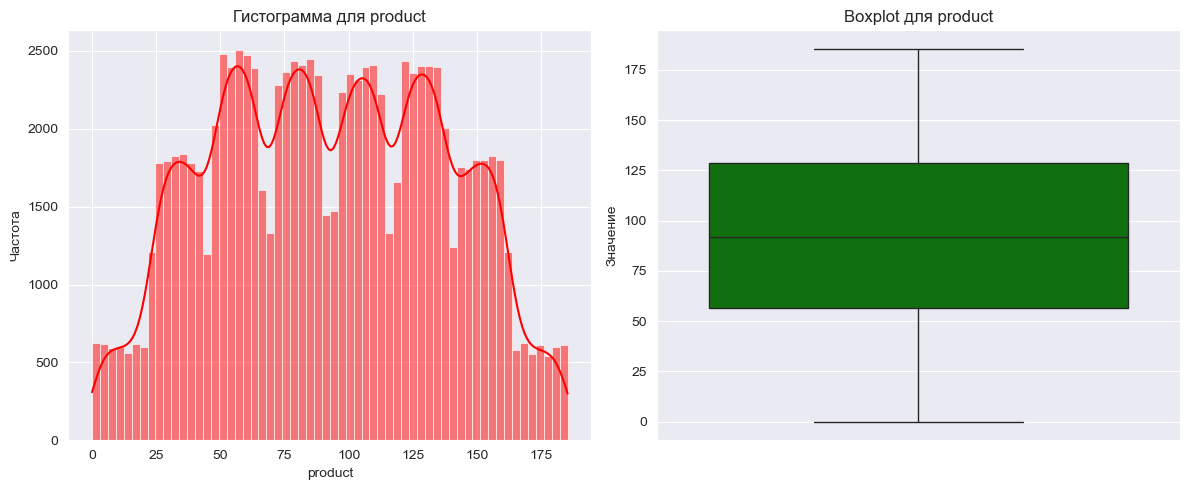

None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [7]:
display(analysis(df0), df0.describe())

**Промежуточный вывод:**  
>_Для первого региона распределение признака **f0** носит мультимодальный характер.  
    Минимальное значение -1.4 | Максимальное значение 2.36 | 0.5-квантиль 0.5_

>_Признак **f1** распределен мультимодально, с тремя пиками.  
    Минимальное значение -0.84 | Максимальное значение 1.34 | 0.5-квантиль 0.25_


>_Признак **f2** распределен нормально вокруг значения в 2.5  
    Минимальное значение -12 | Максимальное значение 16 | 0.5-квантиль 2.51  
    Признак имеет большое количество экстремально больших и экстремально низких значений.  
    Отсутствие контекста затрудняет выработку стратегии обработки этих значений.  
    Учитывая высокое общее качество подготовки данных, можно предположить,  
    что выявленные экстремальные значения не являются аномалиями и не нуждаются в обработке._


>_Переменная **product** — объём запасов в скважине, распределена мультимодально  
    Минимальное значение 0 | Максимальное значение 185 | 0.5-квантиль 91.84_

## ➢  Визуализация распределений и мультиколлинеарность дизайн матрицы для региона №2

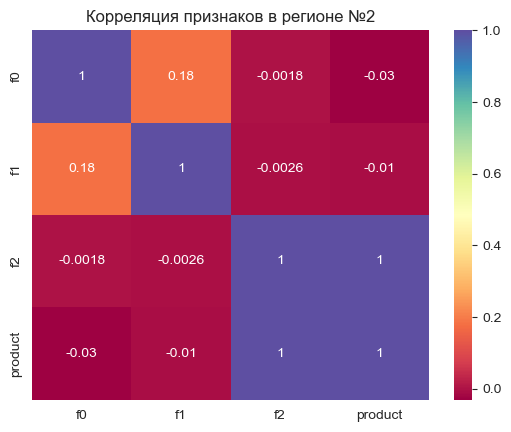

In [8]:
ax = sns.heatmap(data=df1.corr(), annot=True, cmap='Spectral')
ax.set(title='Корреляция признаков в регионе №2');

**Промежуточный вывод:**
>_Признак **f2**, для второго региона, является линейной комбинацией целевой  
переменной, эта пара обладает наивысшей степенью положительной корреляции._

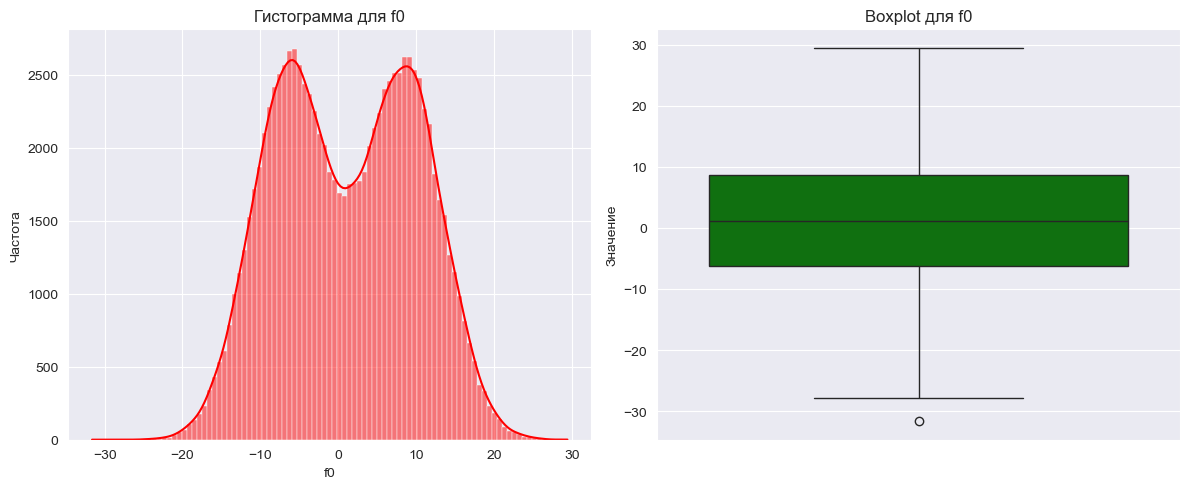

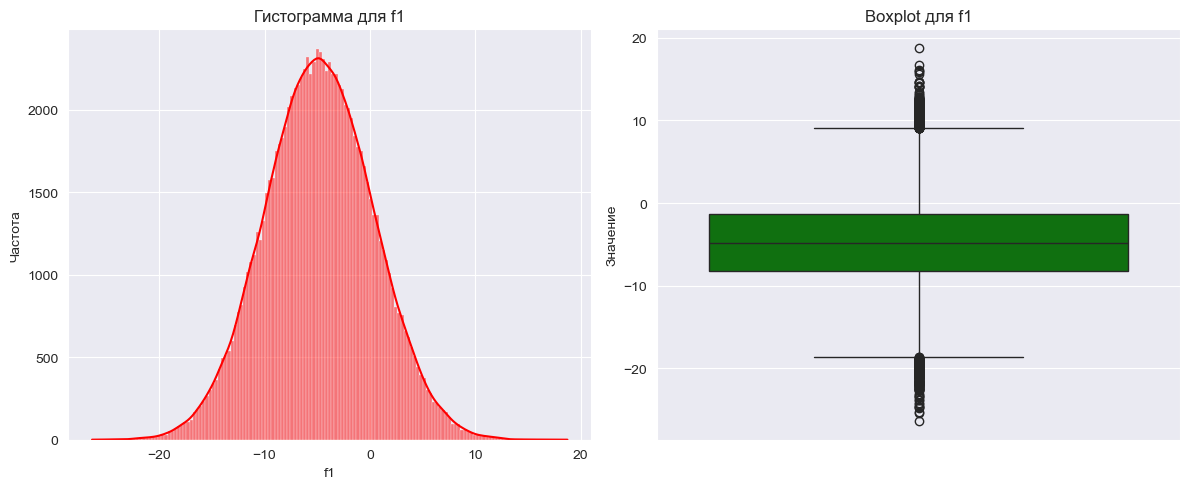

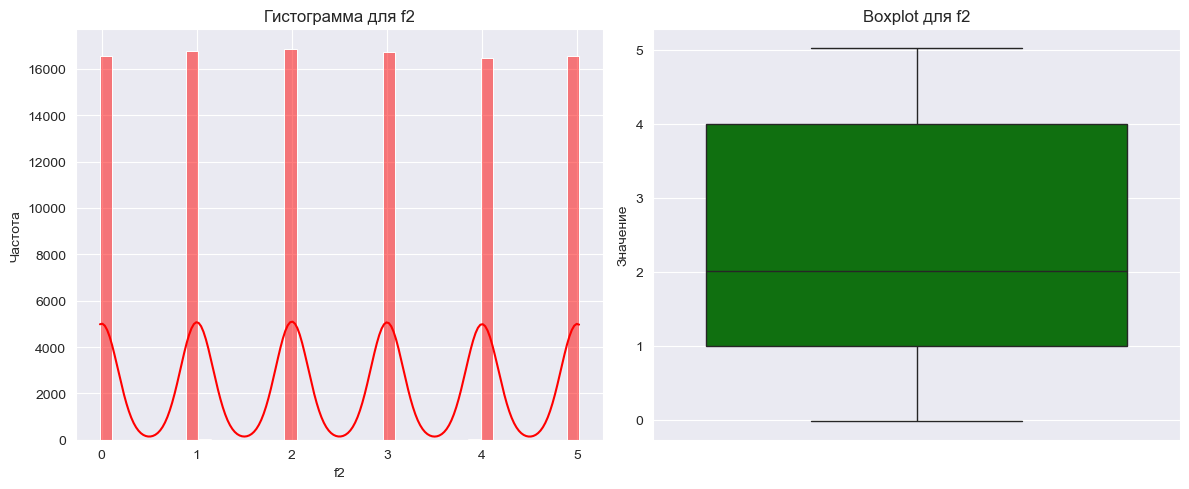

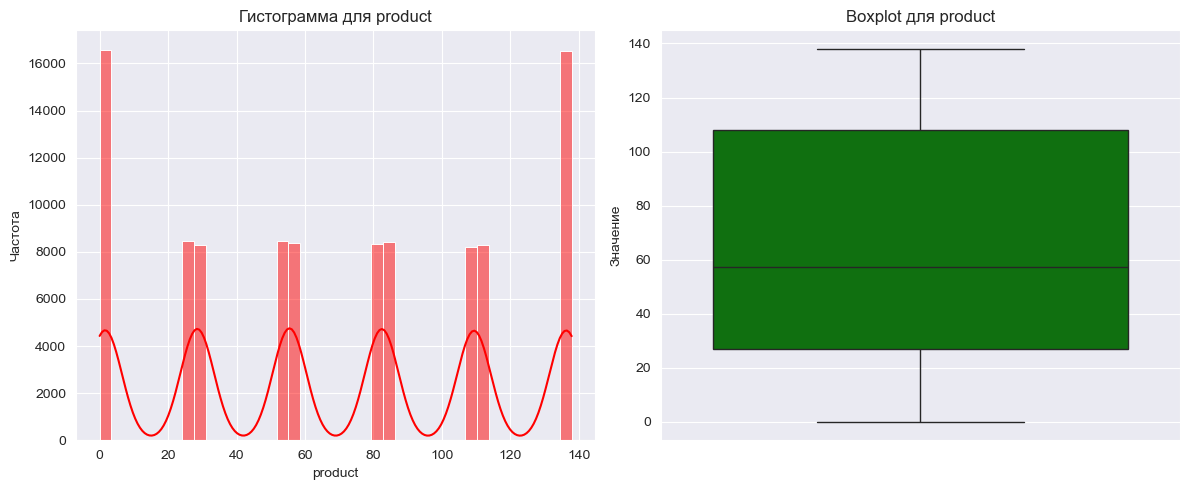

None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [9]:
display(analysis(df1), df1.describe())

**Промежуточный вывод:**  
>_Для второго региона распределение признака **f0** носит бимодальный характер с пиками  
в районе 10 и -10.  
Минимальное значение -31.6 | Максимальное значение 29.42 | 0.5-квантиль 1.15_

>_Признак **f1** распределен нормально вокруг значения -4.8  
Минимальное значение -26.35 | Максимальное значение 18.73 | 0.5-квантиль -4.8_

>_Распределение признака **f2** тяготеет к равномерному от 0 до 5  
Минимальное значение 0 | Максимальное значение 5 | 0.5-квантиль 2_

>_Переменная **product** — объём запасов в скважине, распределена мультимодально  
Минимальное значение 0 | Максимальное значение 137 | 0.5-квантиль 57_


## ➢ Визуализация распределений и мультиколлинеарность дизайн матрицы для региона №3

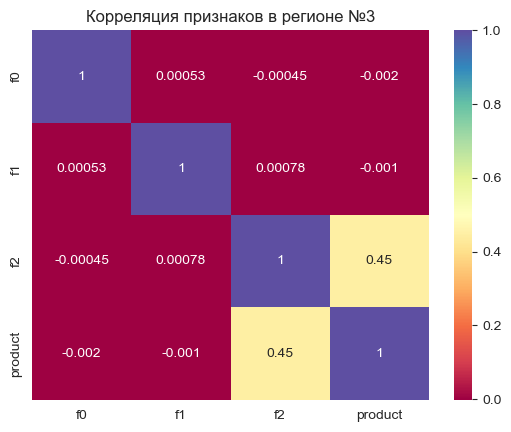

In [10]:
ax = sns.heatmap(data=df2.corr(), annot=True, cmap='Spectral')
ax.set(title='Корреляция признаков в регионе №3');

**Промежуточный вывод:**
>_Анализ последнего региона указал на существование устойчивой взаимосвязи  
между признаком **f2** и переменной product, внутри дизайн-матрицы коллинеарности 
нет._

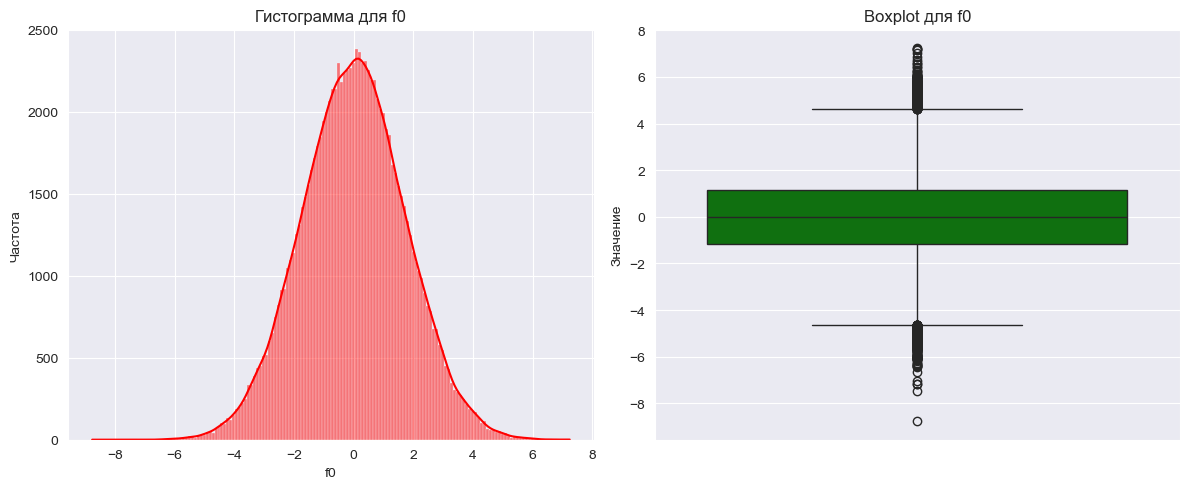

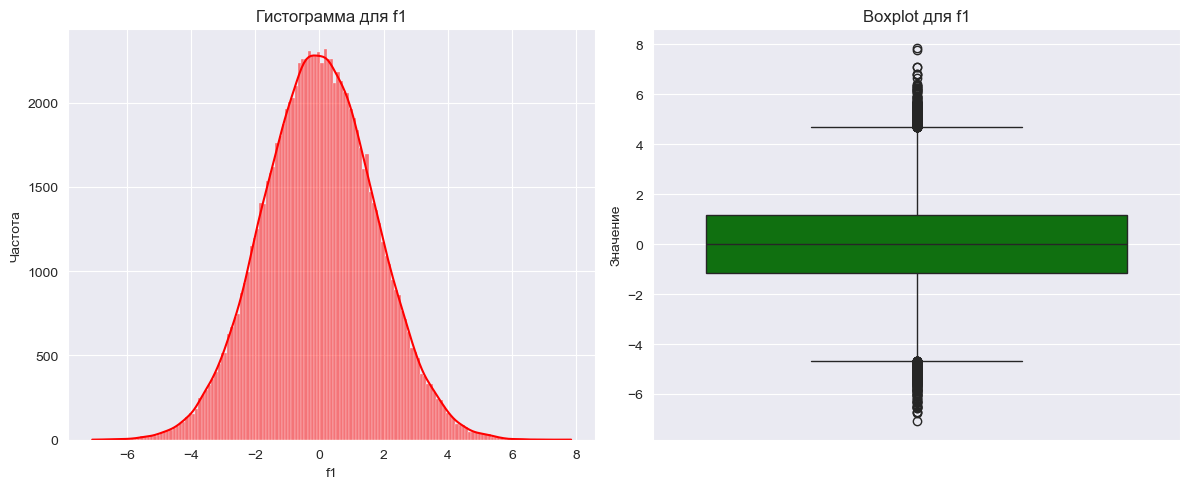

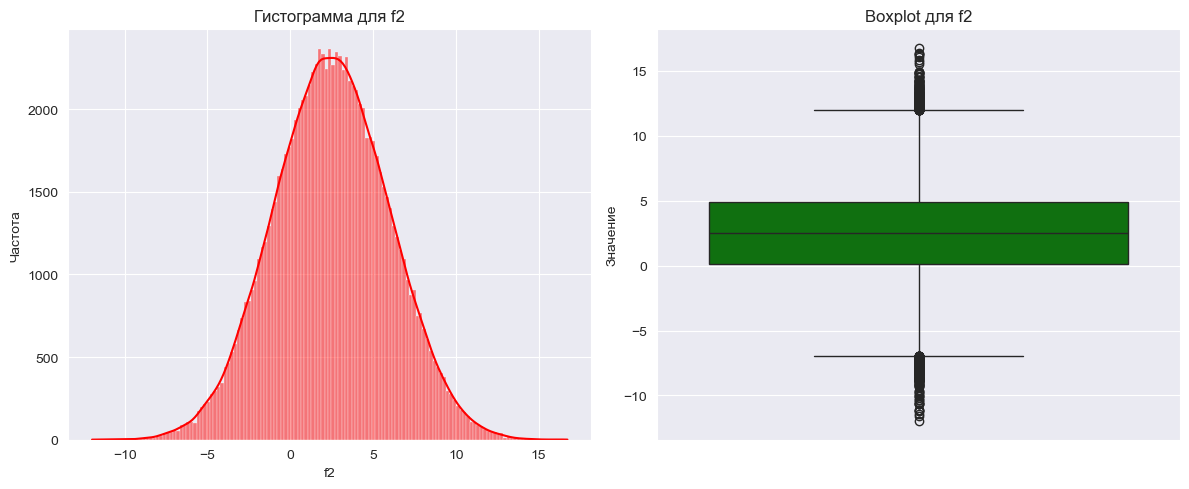

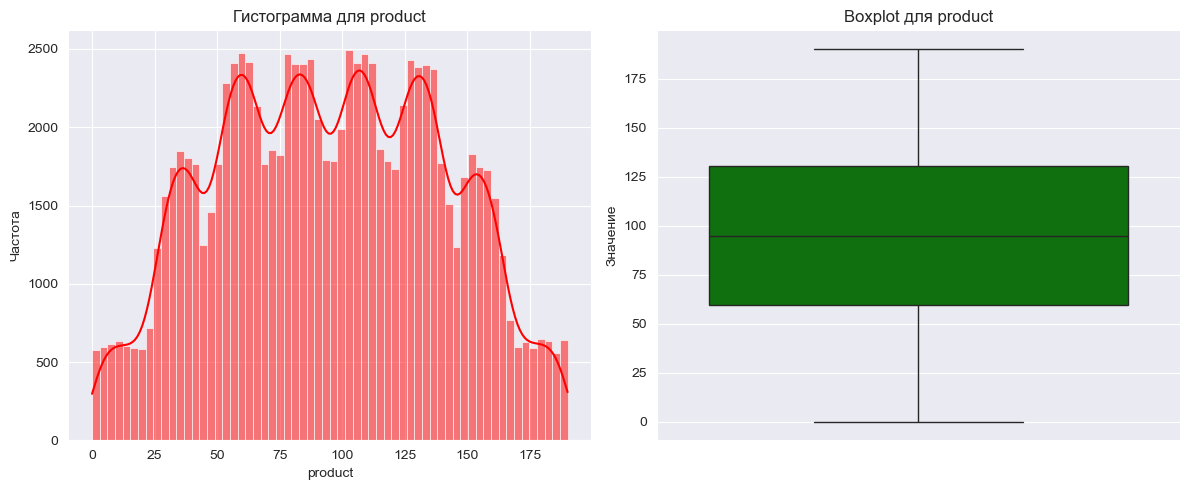

None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [11]:
display(analysis(df2), df2.describe())

**Промежуточный вывод:**  
>_Для третьего региона распределение признака **f0** носит нормальный характер с центром  
в районе 0.  
Минимальное значение -8.76 | Максимальное значение 7.23 | 0.5-квантиль 0_

>_Признак **f1** распределен нормально вокруг значения 0  
Минимальное значение -7.08 | Максимальное значение 7.84 | 0.5-квантиль 0_

>_Признак **f2** распределен нормально вокруг значения 2.48  
Минимальное значение -11.97 | Максимальное значение 16.73 | 0.5-квантиль 2.48_

>_Переменная **product** — объём запасов в скважине, распределена мультимодально  
Минимальное значение 0 | Максимальное значение 190 | 0.5-квантиль 94.92_


## Вывод шага Ⅰ:  
> На основании полученных **.csv-таблиц** были созданы 3 датафрейма. Проведена  
инспекция наличия дубликатов в строках. Согласно техническому заданию, были  
построены требуемые визуализации распределений и проведён анализ наличия  
мультиколлинеарности в признаковых пространствах. Характеристики полученных  
показателей описаны в соответсвующих приложениях к исследованию.

# Ⅱ Шаг. Прогнозирование запасов в скважинах

## ➢ Сплит датасета и обучение моделей

In [12]:
random_state = RandomState(12345)
model = LinearRegression()
scaler = StandardScaler()

In [13]:
def data_splitter(df, size=0.25, random_state=random_state):
    features_train, features_valid, target_train, target_valid = train_test_split(
        df.drop('product', axis=1), df['product'], test_size=size,
        random_state=random_state)
    scaler.fit(features_train)
    features_train = pd.DataFrame(scaler.transform(features_train),
                                  index=target_train)
    features_valid = pd.DataFrame(scaler.transform(features_valid),
                                  index=target_valid)

    return features_train, features_valid, target_train, target_valid

In [14]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = data_splitter(
    df0, 0.25, random_state)
features_train_1, features_valid_1, target_train_1, target_valid_1 = data_splitter(
    df1, 0.25, random_state)
features_train_2, features_valid_2, target_train_2, target_valid_2 = data_splitter(
    df2, 0.25, random_state)
print(
    f"Размеры созданных выборок: \nI Train {features_train_0.shape} | Valid {features_valid_0.shape}  \
      \nII Train {features_train_1.shape} | Valid {features_valid_1.shape} \
      \nIII Train {features_train_2.shape} | Valid {features_valid_2.shape}")

Размеры созданных выборок: 
I Train (75000, 3) | Valid (25000, 3)        
II Train (75000, 3) | Valid (25000, 3)       
III Train (75000, 3) | Valid (25000, 3)


In [15]:
model_0 = model.fit(features_train_0, target_train_0)
preds_0 = pd.Series(model_0.predict(features_valid_0),
                    index=target_valid_0.index)

model_1 = model.fit(features_train_1, target_train_1)
preds_1 = pd.Series(model_1.predict(features_valid_1),
                    index=target_valid_1.index)

model_2 = model.fit(features_train_2, target_train_2)
preds_2 = pd.Series(model_2.predict(features_valid_2),
                    index=target_valid_2.index)


**Промежуточный вывод:**
>_С помощью функции data_splitter выборки были разбиты на тренировочную и тестовую,  
в соотношении 3:1, в качестве алгоритма была выбрана линейная регрессия без  
использования регуляризации, в соответствии с техническим заданием._

## ➢ Анализ остатков прогнозов по регионам

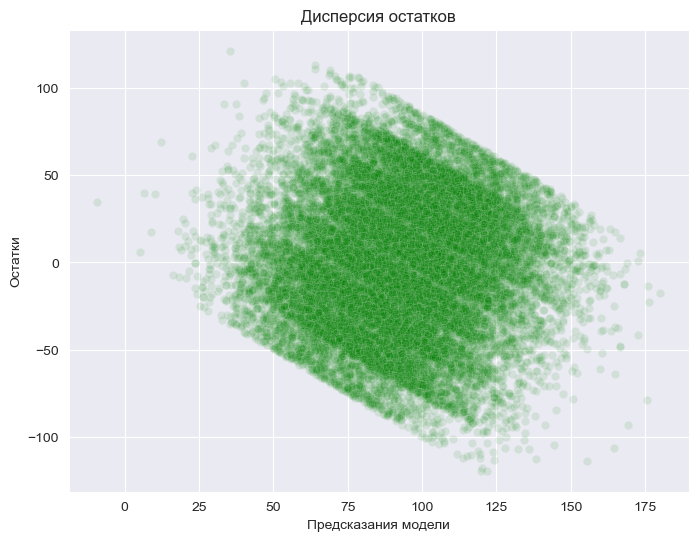

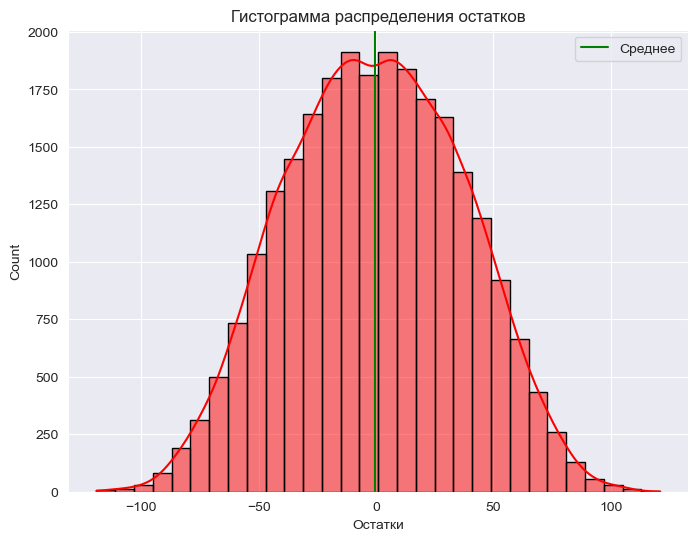

In [16]:
residuals = np.array(target_valid_0).ravel() - preds_0

plt.figure(figsize=(8, 6))
sns.scatterplot(x=preds_0, y=residuals, color='green', alpha=0.1)
plt.xlabel('Предсказания модели')
plt.ylabel('Остатки')
plt.title('Дисперсия остатков')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, color='red', edgecolor='black', kde=True)
plt.axvline(x=residuals.mean(), color='green', label='Среднее')
plt.title('Гистограмма распределения остатков')
plt.xlabel('Остатки')
plt.legend()
plt.show()

rmse_0 = mean_squared_error(target_valid_0, preds_0)

In [17]:
print(f"RMSE для I региона: {rmse_0 ** 0.5} \
      \nСредний запас по I региону: {preds_0.mean():.4f}")

RMSE для I региона: 37.5794217150813       
Средний запас по I региону: 92.5926


**Промежуточный вывод:**
>_Анализ остатков помог выявить отсутствие закономерностей в распределениях.  
Среднее на гистограмме находится близко к 0, что говорит о потенциально высоких   
обобщающих свойствах модели._

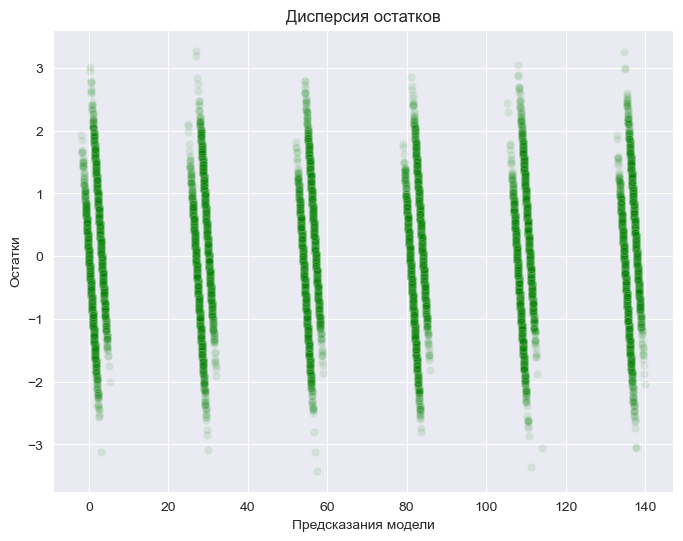

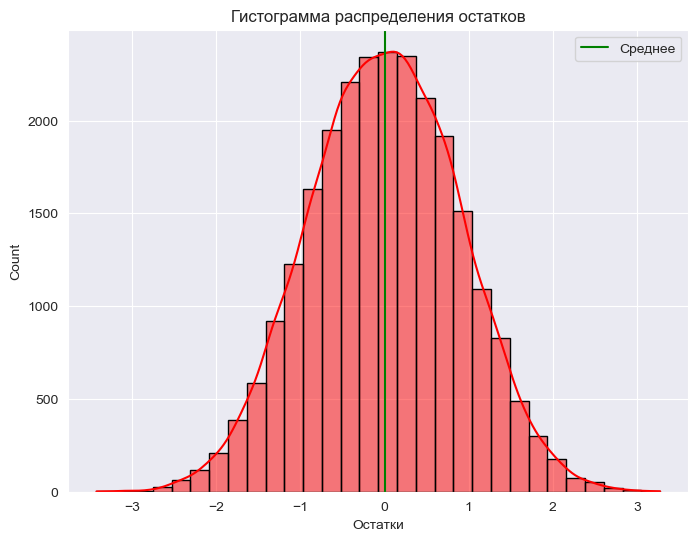

In [18]:
residuals = np.array(target_valid_1).ravel() - preds_1

plt.figure(figsize=(8, 6))
sns.scatterplot(x=preds_1, y=residuals, color='green', alpha=0.1)
plt.xlabel('Предсказания модели')
plt.ylabel('Остатки')
plt.title('Дисперсия остатков')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, color='red', edgecolor='black', kde=True)
plt.axvline(x=residuals.mean(), color='green', label='Среднее')
plt.title('Гистограмма распределения остатков')
plt.xlabel('Остатки')
plt.legend()
plt.show()

rmse_1 = mean_squared_error(target_valid_1, preds_1)

In [19]:
print(f"RMSE для II региона: {rmse_1 ** 0.5} \
      \nСредний запас по II региону: {preds_1.mean():.4f}")

RMSE для II региона: 0.889736773768065       
Средний запас по II региону: 68.7700


**Промежуточный вывод:**
>_Диаграмма рассеяния для этого региона имеет вид, который сильно отличается от  
предыдущих результатов. **RMSE** находится на очень низком уровне, это связано с тем,  
что модели удалось эффективно использовать при прогнозировании высочайшую степень  
взаимной изменчивости между признаком **f1** и целевой переменной. Среднее на  
гистограмме находится в районе 0._

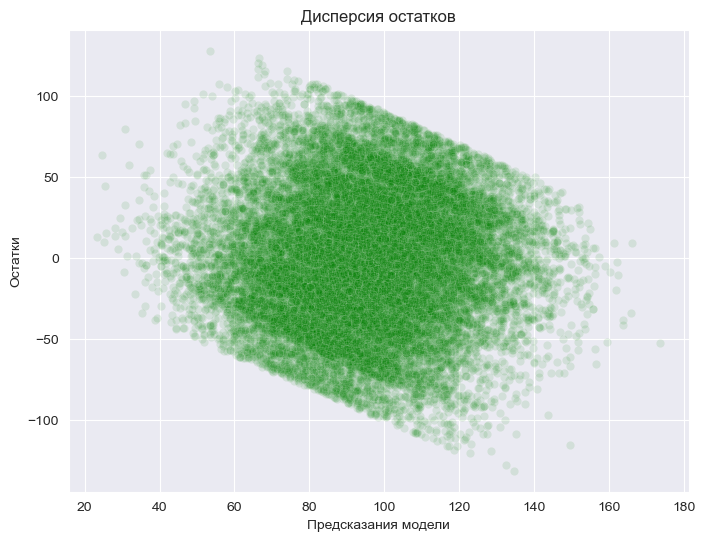

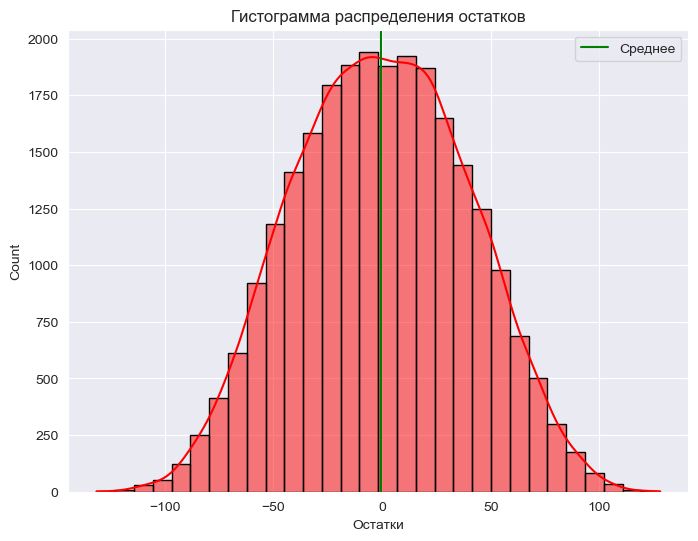

In [20]:
residuals = np.array(target_valid_2).ravel() - preds_2

plt.figure(figsize=(8, 6))
sns.scatterplot(x=preds_2, y=residuals, color='green', alpha=0.1)
plt.xlabel('Предсказания модели')
plt.ylabel('Остатки')
plt.title('Дисперсия остатков')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, color='red', edgecolor='black', kde=True)
plt.axvline(x=residuals.mean(), color='green', label='Среднее')
plt.title('Гистограмма распределения остатков')
plt.xlabel('Остатки')
plt.legend()
plt.show()

rmse_2 = mean_squared_error(target_valid_2, preds_2)

In [21]:
print(f"RMSE для III региона: {rmse_2 ** 0.5} \
      \nСредний запас по III региону: {preds_2.mean():.4f}")

RMSE для III региона: 39.958042459521614       
Средний запас по III региону: 95.0875


**Промежуточный вывод:**
>_Для региона №3 удалось получить результаты, схожие с регионом №1. Визуализация  
распределений остатков даёт понять, что какие-либо закономерности в них отсутствуют._

## Вывод шага Ⅱ:  
> В ходе исследования были обучены 3 различные модели линейной регрессии, без  
использования регуляризации. Каждый алгоритм сделал прогноз для своего региона,  
после чего был проведён анализ остатков с помощью диаграммы рассеяния и гистограммы.  
Все модели показали удовлетворительные результаты, однако самым точным можно назвать  
прогноз для второго региона. Высокое качество предсказания объясняется наличием в  
дизайн-матрице признака, который имеет наивысшую степень корреляции с целевой  
переменной.

# Ⅲ Шаг. Расчёт прибыли

## ➢ Постановка задачи

_При разведке региона исследуют 500 точек, из которых с помощью машинного обучения  
выбирают 200 лучших для разработки. Бюджет на разработку скважин в регионе — 10 млрд рублей.  
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой  
единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.  
После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%.  
Среди них выбирают регион с наибольшей средней прибылью._

In [22]:
RESEARCHED_WELLS = 500
BEST_WELLS = 200
BUDGET = 10_000_000_000
REVENUE = 450_000
RISK = 0.025
BOOTSTRAP_SAMPLES = 1000

**Промежуточный вывод:**
>_Ключевые параметры задачи были сохранены в соответствующих переменных.  
Бюджет и доходы были сокращены на 1000, что позволит получать ответ в тысячах._

## ➢ Расчёт достаточного объёма сырья для безубыточной разработки

In [23]:
threshold = BUDGET / BEST_WELLS / REVENUE
print(f"Порог находится на отметке: {round(threshold, 2)}")

Порог находится на отметке: 111.11


**Промежуточный вывод:**
>_Порог безубыточности для скважины составляет 111.11 тысяч баррелей.  
Не многие скважины в наших регионах смогут похвастаться такими показателями,  
принимая во внимание, что:  
        **Средний запас в I регионе: 92.5926 баррелей.  
        Средний запас в II регионе: 68.7700 баррелей.  
        Средний запас в III регионе: 95.0875 баррелей.**_

## ➢ Функция расчёта прибыли по выбранным скважинам

In [24]:
def calculate_profit(target, probabilities, selected, prof):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:selected]
    return prof * selected.sum() - BUDGET

## ➢ Вычисление прогнозируемой прибыли, оценка рисков

In [25]:
profit_0 = calculate_profit(target_valid_0, preds_0, BEST_WELLS, REVENUE)
profit_1 = calculate_profit(target_valid_1, preds_1, BEST_WELLS, REVENUE)
profit_2 = calculate_profit(target_valid_2, preds_2, BEST_WELLS, REVENUE)
print(f'Прибыль по I региону {profit_0:.0f} руб. \
      \nПрибыль по II региону {profit_1:.0f} руб. \
      \nПрибыль по III региону {profit_2:.0f} руб.')

Прибыль по I региону 3320826043 руб.       
Прибыль по II региону 2415086697 руб.       
Прибыль по III региону 2539915946 руб.


In [26]:
def bootstrap(target, valid):
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True,
                                         random_state=random_state)
        probs_subsample = valid[target_subsample.index]

        values.append(
            calculate_profit(target_subsample, probs_subsample, BEST_WELLS,
                             REVENUE))
    values = pd.Series(values)
    return values

In [27]:
values_0 = bootstrap(target_valid_0, preds_0)
values_1 = bootstrap(target_valid_1, preds_1)
values_2 = bootstrap(target_valid_2, preds_2)

In [28]:
def print_stats(values):
    mean = values.mean()
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    risk = values[values < 0].count() / values.count() * 100

    print(f"Средняя выручка: {mean:.2f}")
    print(f"Доверительный интервал (95%): [{lower:.2f}, {upper:.2f}]")
    print(f"Риск получения убытков: {risk:.2f}%")

In [29]:
print("Регион I:")
print_stats(values_0)

print("\nРегион II:")
print_stats(values_1)

print("\nРегион III:")
print_stats(values_2)

Регион I:
Средняя выручка: 423897237.92
Доверительный интервал (95%): [-76187813.89, 957846531.95]
Риск получения убытков: 4.80%

Регион II:
Средняя выручка: 513256698.92
Доверительный интервал (95%): [108066895.23, 928574439.23]
Риск получения убытков: 0.60%

Регион III:
Средняя выручка: 380495964.80
Доверительный интервал (95%): [-142800630.09, 893380565.75]
Риск получения убытков: 7.40%


## Вывод шага Ⅲ:  
> С целью оценки надёжности прогнозов и определения риска убытков был применён  
метод бутстрэппинга с 1000 итерациями, что позволило построить 95% доверительные  
интервалы для каждого региона. Анализ полученных результатов показал,  
что наименее рискованным для инвестиций является регион II, где вероятность  
понести убытки составляет менее 2.5%, что соответствует допустимому уровню риска. 

 
Следует отметить, что точность прогнозных моделей для регионов I и III оказалась ниже,  
что объясняется отсутствием в исходных данных признаков с высокой степенью  
положительной корреляции с целевым показателем. Это ограничение существенно повлияло  
на обобщающую способность моделей и увеличило неопределённость прогнозов для указанных  
регионов. В случае, если заказчик сможет предоставить дополнительные признаки с более  
выраженной корреляцией с целевой переменной, это позволит улучшить точность моделей и  
потенциально пересмотреть оценку рисков для регионов I и III.